In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
object_categories = ['aeroplane', 'bicycle', 'bird', 'boat',
                     'bottle', 'bus', 'car', 'cat', 'chair',
                     'cow', 'diningtable', 'dog', 'horse',
                     'motorbike', 'person', 'pottedplant',
                     'sheep', 'sofa', 'train', 'tvmonitor']

sns.set(font_scale=1.5, rc={'text.usetex' : True})

In [7]:
def coef_p(x, m):
    return -m * np.exp(-m * x)

def sigmoid(x):
    return 1./(1. + np.exp(-x))

In [8]:
xs = np.linspace(-100, 100, 100)   
Z = 20
global_cam = np.load('../global_cam.npy')
global_vec = np.mean(global_cam * 12, axis=(1,2))

Text(0.5, 1.0, 'Gradient for Positive Class')

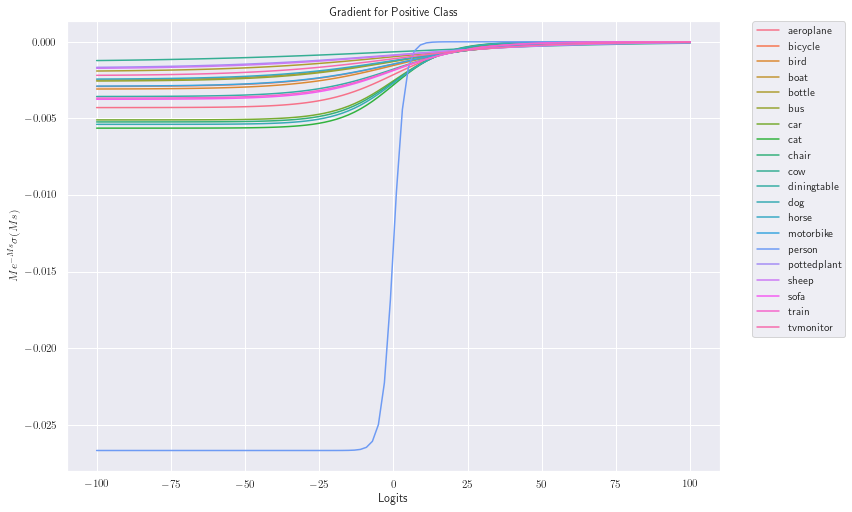

In [11]:
d = {}
d['Logits'] = xs

ys = []
for idx, m in enumerate(global_vec):
    d[object_categories[idx]] = coef_p(xs, m) * (sigmoid(m * xs)/Z)

df = pd.DataFrame(data=d)
dfm = df.melt('Logits', var_name='Class', value_name='$Me^{-Ms}\sigma(Ms)$')

sns.lineplot(data=dfm, x="Logits", y="$Me^{-Ms}\sigma(Ms)$",
    hue="Class"
)

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Gradient for Positive Class')

Text(0.5, 1.0, 'Gradient for Negative Class')

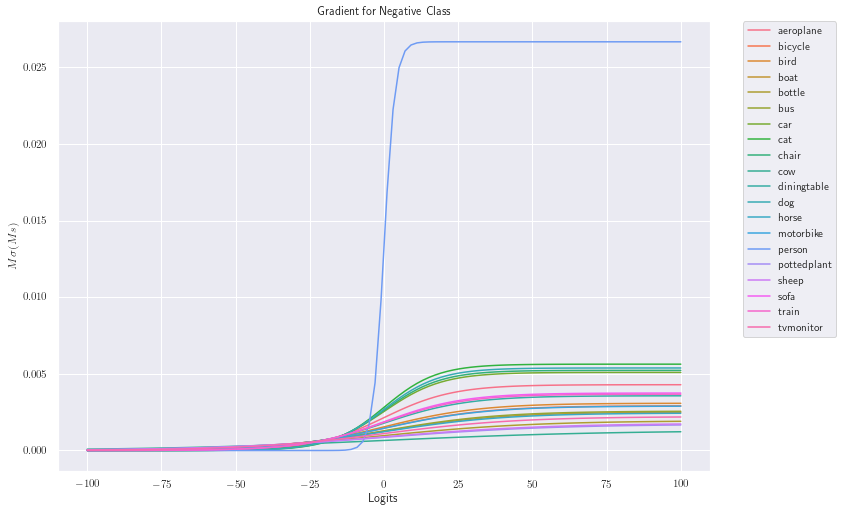

In [13]:
d = {}
d['Logits'] = xs

ys = []
for idx, m in enumerate(global_vec):
    d[object_categories[idx]] = m * (sigmoid(m * xs)/Z)

df = pd.DataFrame(data=d)
dfm = df.melt('Logits', var_name='Class', value_name='$M\sigma(Ms)$')

sns.lineplot(data=dfm, x="Logits", y="$M\sigma(Ms)$",
    hue="Class"
)

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Gradient for Negative Class')

Text(0.5, 1.0, '$\\sigma(Ms)$')

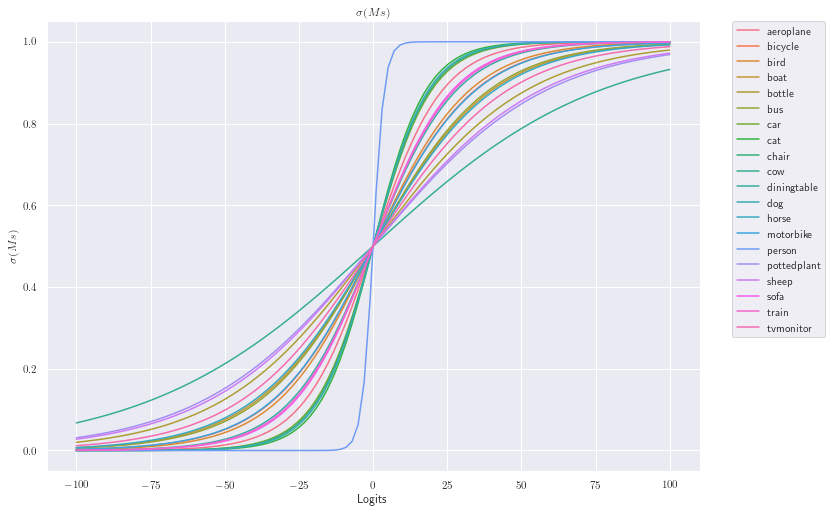

In [114]:
d = {}
d['Logits'] = xs

ys = []
for idx, m in enumerate(global_vec):
    d[object_categories[idx]] = sigmoid(m * xs)

df = pd.DataFrame(data=d)
dfm = df.melt('Logits', var_name='Class', value_name='$\sigma(Ms)$')

sns.lineplot(data=dfm, x="Logits", y="$\sigma(Ms)$",
    hue="Class"
)

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('$\sigma(Ms)$')

In [23]:
# C2AM
mious = {'C$^2$AM: mIoU 69.1': np.array([0.88614127, 0.7224135 , 0.37948761, 0.79298366, 0.58668022,      
        0.65225267, 0.84204695, 0.74913452, 0.84103382, 0.39801444,              
        0.82183807, 0.53044886, 0.7776393 , 0.83748432, 0.79899954,              
        0.72188689, 0.51614735, 0.85656707, 0.62780143, 0.62370535,              
        0.53934591]), 'CAM: mIoU 65.3': np.array([0.87917766, 0.67227121, 0.35942197, 0.76256142, 0.58875524,
        0.61210626, 0.80195505, 0.69033153, 0.74489198, 0.33625327,
        0.7751565 , 0.41982922, 0.72092112, 0.7774972 , 0.75148308,
        0.68446215, 0.52643946, 0.82553838, 0.56916316, 0.64415595,
        0.57197679]), 'Labels': ['background'] + object_categories}  


df = pd.DataFrame(data=mious)
dfm = df.melt('Labels', var_name='Algorithm', value_name='mIoU')


<AxesSubplot:xlabel='Labels', ylabel='mIoU'>

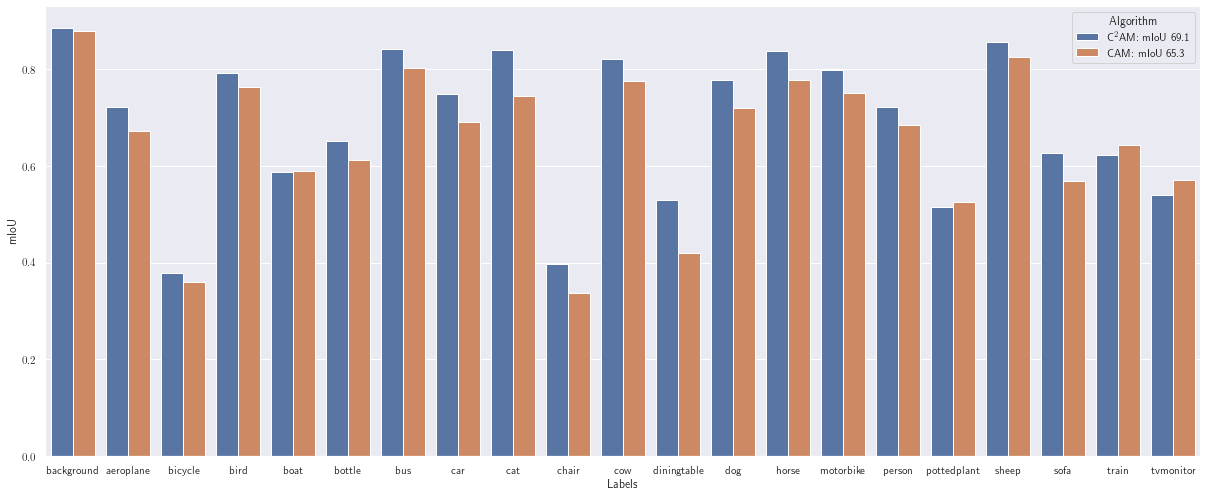

In [24]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.barplot(x="Labels", y="mIoU", hue="Algorithm", data=dfm)